# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 10 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [ ]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [ ]:
N = int(1e4)  # use this
theta  = 1
X = sps.uniform(0, theta).rvs(N)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [ ]:
def calc_est(X):
  est = [np.zeros(N) for i in range(0, 5)]
  X_n = np.arange(1, N + 1)
  X_average = np.cumsum(X) / X_n
  X_min = np.minimum.accumulate(X)
  X_max = np.maximum.accumulate(X)
  est[0] = 2 * X_average
  est[1] = X_average + (X_max / 2)
  est[2] = (X_n + 1) * X_min
  est[3] = X_min + X_max
  est[4] = ((X_n + 1)/X_n) * X_max
  return est

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

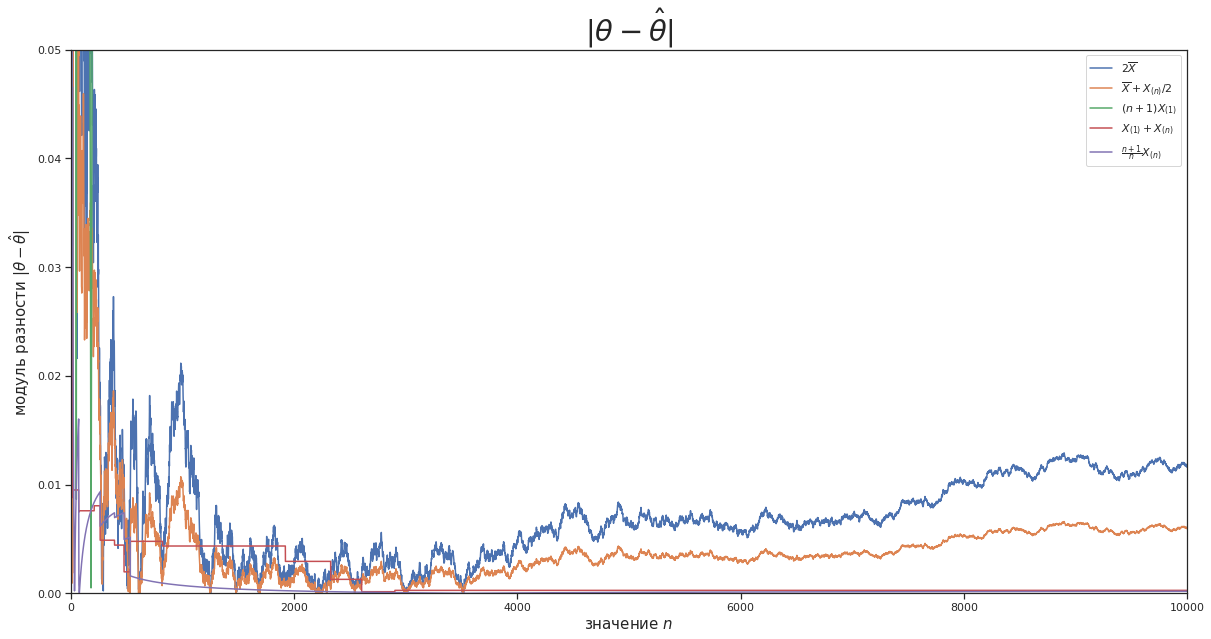

In [ ]:
est = calc_est(X)
def build():
  X_n = np.arange(1, N + 1)
  plt.figure(figsize=(20, 10))
  sns.set_theme(style="ticks")
  sns.lineplot(x=X_n, y=np.abs(est[0] - theta), label=r'$2\overline{X}$')
  sns.lineplot(x=X_n, y=np.abs(est[1] - theta), label=r'$\overline{X} + X_{(n)}/ 2$')
  sns.lineplot(x=X_n, y=np.abs(est[2] - theta), label=r'$(n+1)X_{(1)}$')
  sns.lineplot(x=X_n, y=np.abs(est[3] - theta), label=r'$X_{(1)}+X_{(n)}$')
  sns.lineplot(x=X_n, y=np.abs(est[4] - theta), label=r'$\frac{n+1}{n} X_{(n)}$')
  plt.ylim(0, 0.05)
  plt.xlim(0, N)
  plt.title(r'$ \|\theta - \hat{\theta} \|$', fontsize=29)
  plt.ylabel(r'модуль разности $ \|\theta - \hat{\theta} \|$', fontsize=15)
  plt.xlabel('значение $n$', fontsize=15)
  plt.show()
build()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ $\frac{n+1}{n} X_{(n)}$



Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

$\theta$ = 2

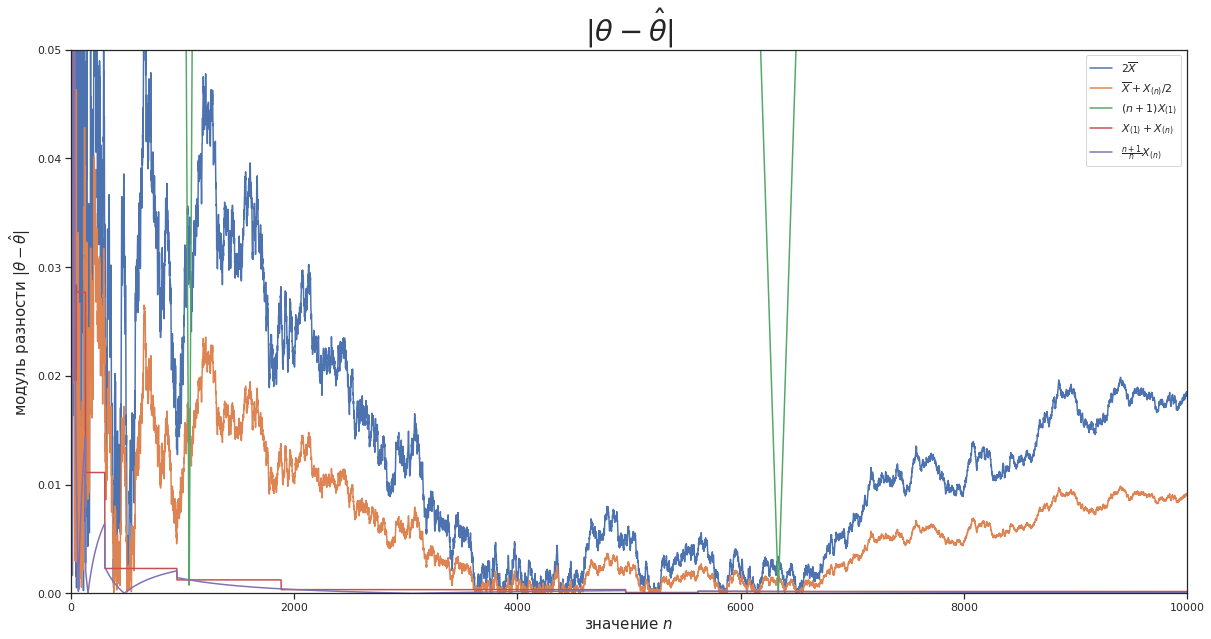

In [ ]:
theta = 2
X = sps.uniform(0, theta).rvs(N)
est = calc_est(X)
build()

$\theta$ = 0.5

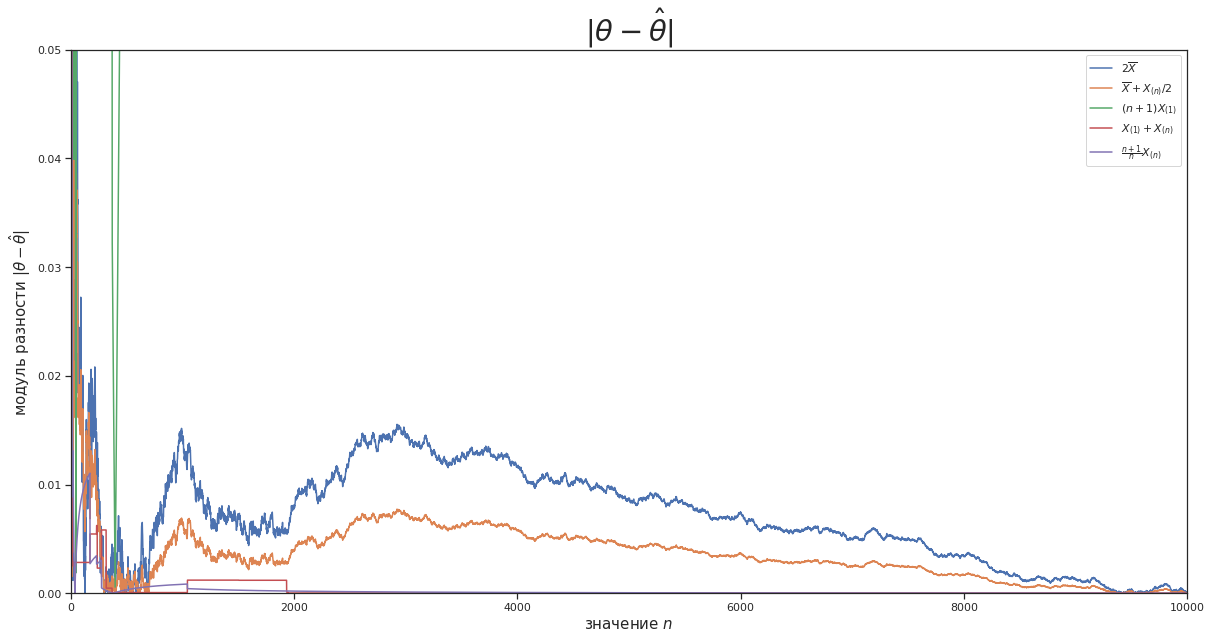

In [ ]:
theta = 0.5
X = sps.uniform(0, theta).rvs(N)
est = calc_est(X)
build()

$\theta$ = 5

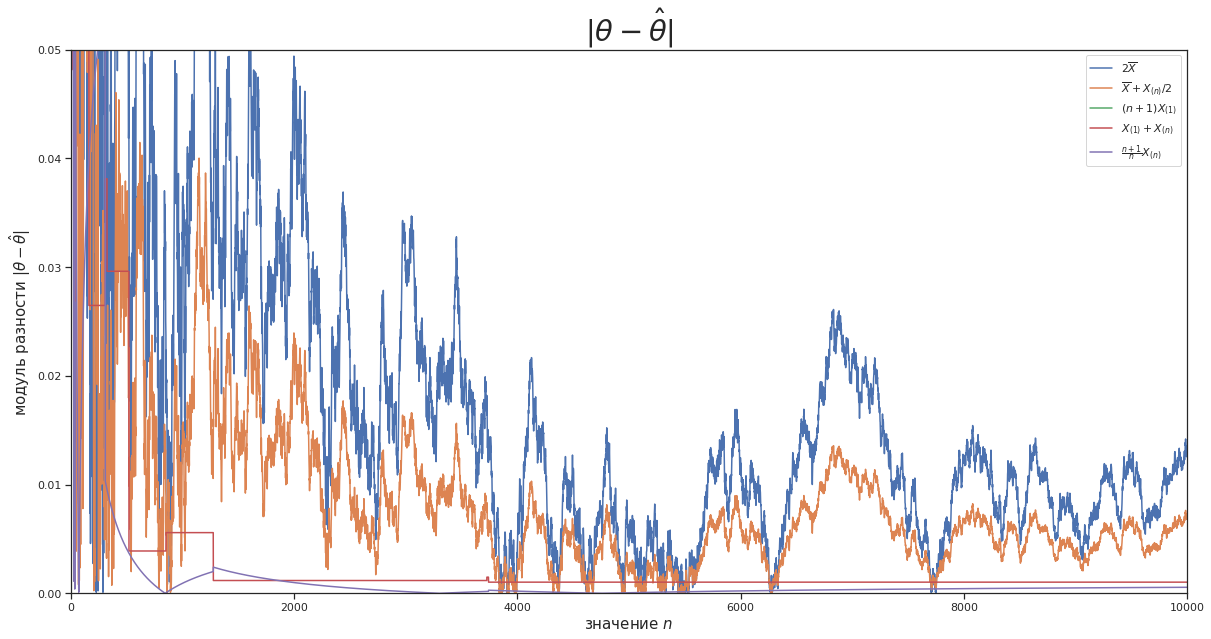

In [ ]:
theta = 5
X = sps.uniform(0, theta).rvs(N)
est = calc_est(X)
build()

$\theta$ = 20

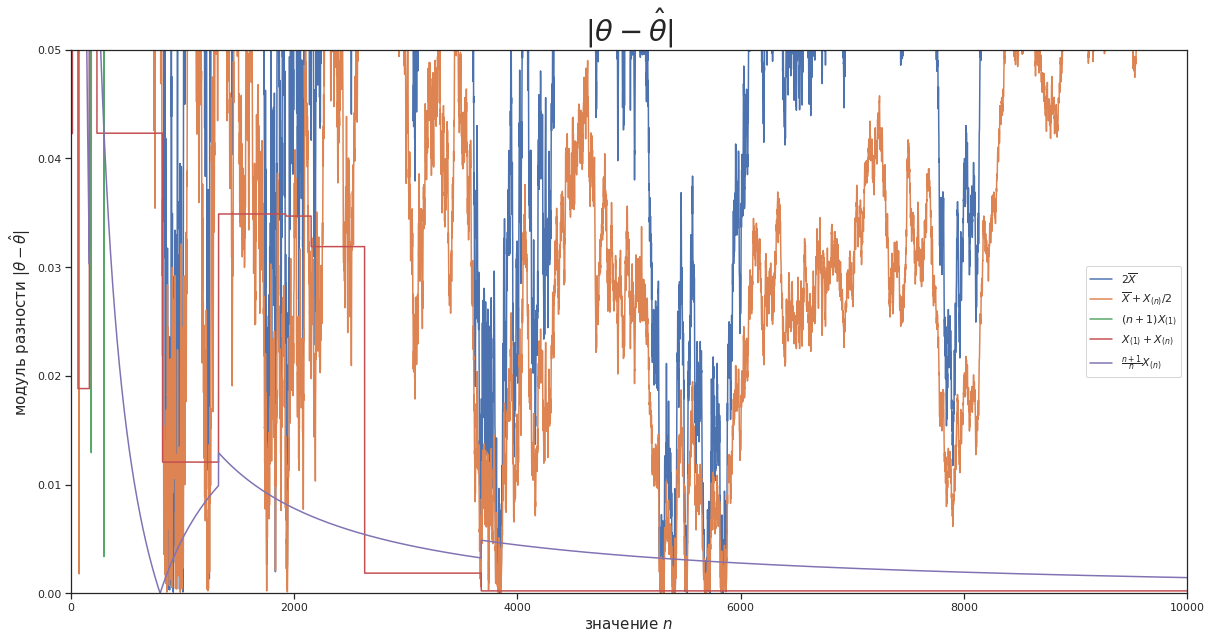

In [ ]:
theta = 20
X = sps.uniform(0, theta).rvs(N)
est = calc_est(X)
build()

Сделайте вывод.


__Вывод:__ хуже всех оценка $(n+1)X_{(1)}$, что объясняется тем, что она несостоятельня. Лучше всех оценки $X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$, сложно сказать какая их них лучше. У оценок $2\overline{X}, \; \overline{X} + X_{(n)}/ 2$
наблюдаются частые "скачки". Также, можно заметить что с ростом $\theta$ величина ошибки  у всех оценок растёт.

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [ ]:
theta = 1
X_exp = sps.expon().rvs(N)

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [ ]:
def calc_for_k(k):
  return (np.math.factorial(k)/(np.cumsum(X_exp ** k) /  np.arange(1,N+1))) ** 1/k

In [ ]:
k_range = np.arange(1, 11)
est = [np.zeros(N) for i in range(0, 10)]
for i in range(0, 10):
  est[i] = calc_for_k(k_range[i])

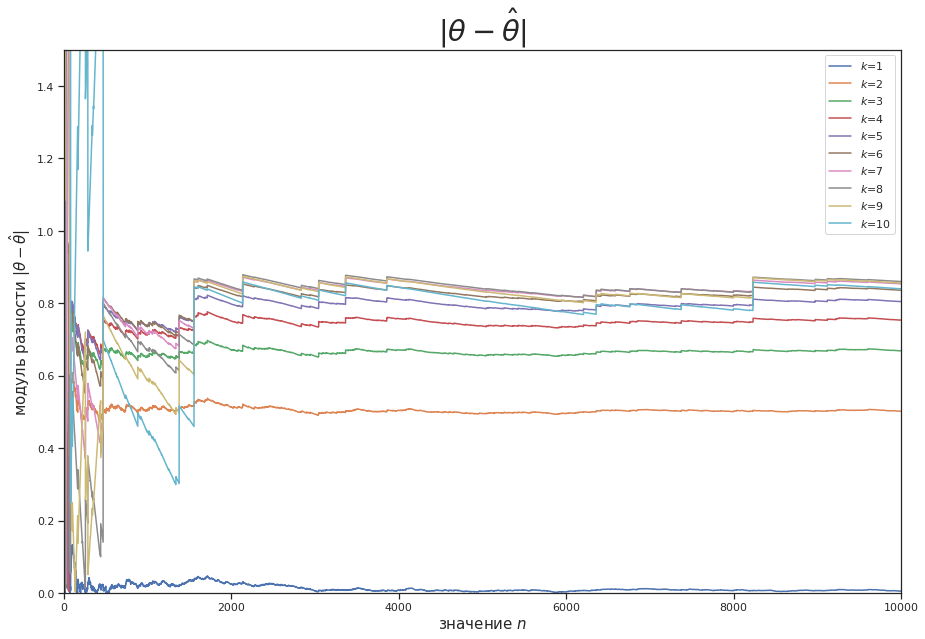

In [ ]:
def build():
  X_n = np.arange(1, N + 1)
  plt.figure(figsize=(15, 10))
  sns.set_theme(style="ticks")
  for idx, k in enumerate(k_range):
    sns.lineplot(x=X_n, y=np.abs(est[idx] - theta), label=f"$k$={k}")
  plt.ylim(0, 1.5)
  plt.xlim(0,N)
  plt.title(r'$ \|\theta - \hat{\theta} \|$', fontsize=29)
  plt.ylabel(r'модуль разности $ \|\theta - \hat{\theta} \|$', fontsize=15)
  plt.xlabel('значение $n$', fontsize=15)
  plt.show()
build()

Сделайте вывод. 

__Вывод:__ Из графика видно что для $k$=1 оценка является наилучшей. С ростом $k$ увеличивается погрешность. Также, можно заметить, что для $k\geq 2$ оценка является смещённой.


### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

Возьмём распределение Парето. Плотность распредления $\frac{5}{x^{6}} \cdot I(x \ge 1).$  

In [ ]:
X_p = sps.pareto.rvs(5, size=N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

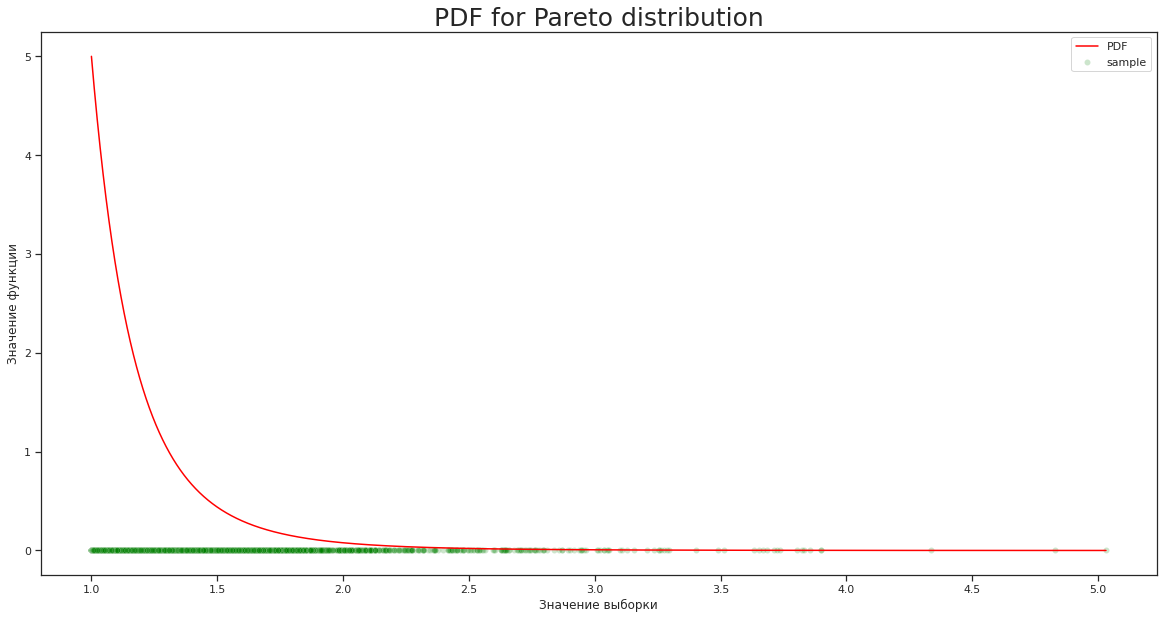

In [ ]:
x_ = np.linspace(np.min(X_p[0:N]), np.max(X_p[0:N]),N)
plt.figure(figsize=(20, 10))
y_ = np.zeros(N)
sns.scatterplot(x=X_p[0:N], y=y_, alpha=0.2, label='sample', color='green')
sns.lineplot(x=x_, y=sps.pareto.pdf(x_, 5), label='PDF', color='red')
plt.title("PDF for Pareto distribution", fontsize=25)
plt.ylabel("Значение функции")
plt.xlabel("Значение выборки")
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [ ]:
X_n = np.arange(1, N + 1)
X_p_average = np.cumsum(X_p) / X_n
X_p_sm = np.cumsum(np.power(X_p, 2)) / X_n
est = X_p_sm - np.power(X_p_average, 2)

$D[X] = \frac{k}{k - 2} * \left(\frac{1}{k - 1}\right)^2 = \frac{5}{48}.$ 

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

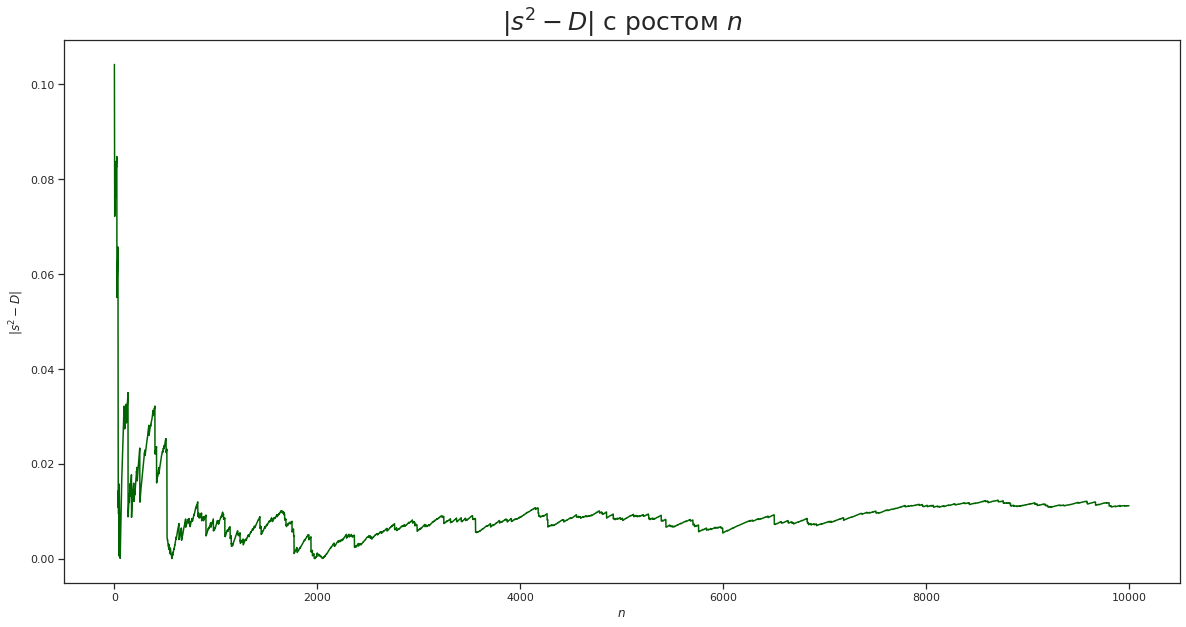

In [ ]:
D = 5./ 48
plt.figure(figsize=(20, 10))
sns.lineplot(x=X_n, y=np.abs(est - D), color = 'darkgreen')
plt.title("$|s^2-D|$ с ростом $n$", fontsize=25)
plt.ylabel("$|s^2-D|$")
plt.xlabel("$n$")
plt.show()

__Вывод:__ Из графика видно, что при стремлении $n$ к $N$ значение оценки дисперсии близко к ее истинному значению

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [ ]:
X_c = sps.cauchy.rvs(size=N)

Построим график плотности, нанесём точки выборки на график (с нулевой y-координатой)

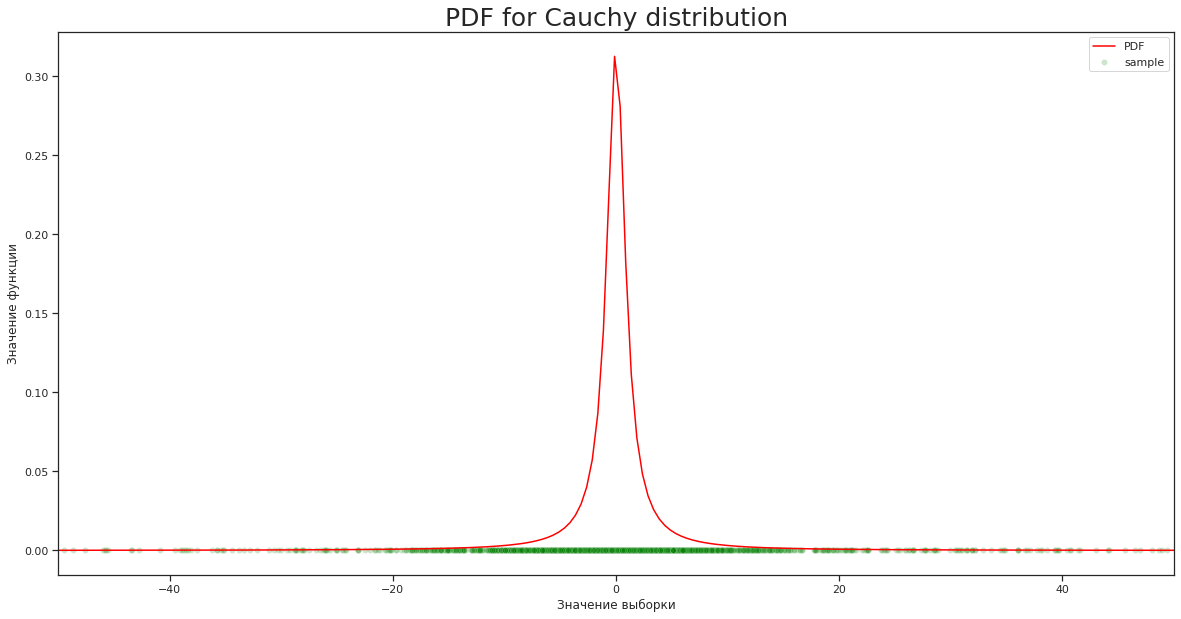

In [ ]:
x_ = np.linspace(np.min(X_c), np.max(X_c),N)
plt.figure(figsize=(20, 10))
y_ = np.zeros(N)
sns.scatterplot(x=X_c, y=y_, alpha=0.2, label='sample', color='green')
sns.lineplot(x=x_, y=sps.cauchy.pdf(x_), label='PDF', color='red')
plt.title("PDF for Сauchy distribution", fontsize=25)
plt.xlim((-50, 50))
plt.ylabel("Значение функции")
plt.xlabel("Значение выборки")
plt.show()

Для всех $n \leq N$ посчитаем оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [ ]:
X_n = np.arange(1, N + 1)
X_c_average = np.cumsum(X_c) / X_n
X_c_sm = np.cumsum(np.power(X_c, 2)) / X_n
est = X_c_sm - np.power(X_c_average, 2)

Построим график оценки дисперсии

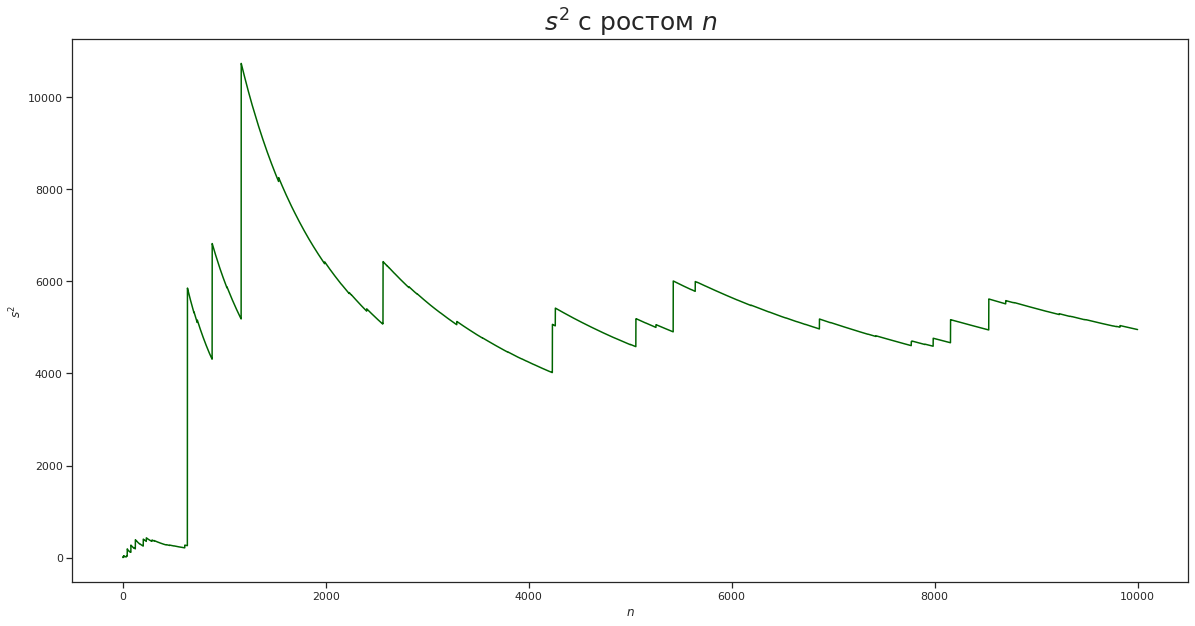

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=X_n, y=np.abs(est), color = 'darkgreen')
plt.title("$s^2$ с ростом $n$", fontsize=25)
plt.ylabel("$s^2$")
plt.xlabel("$n$")
plt.show()

__Вывод:__ Исходя из графика, можно сказать, что оценка дисперсии никуда не сходится, что соответствует тому, что дисперсии не существует

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [ ]:
X_norm = sps.norm().rvs(N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary
ecdf = []
for i in range(0, N):
    ecdf.append(ECDF(X_norm[0:i+1]))

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

In [ ]:
def build(n):
    x_ = np.linspace(np.min(X_norm[0:n]), np.max(X_norm[0:n]),N)
    plt.figure(figsize=(20, 10))
    y_ = np.zeros(n)
    sns.scatterplot(x=X_norm[0:n], y=y_, alpha=0.2, label='sample')
    sns.lineplot(x=x_, y=ecdf[n - 1](x_), label='ECDF')
    sns.lineplot(x=x_, y=sps.norm.cdf(x_), label='CDF')
    plt.title(f"ECDF и CDF при $n={n}$", fontsize=25)
    plt.ylabel("Значение функции")
    plt.xlabel("Значение выборки")
    plt.show()

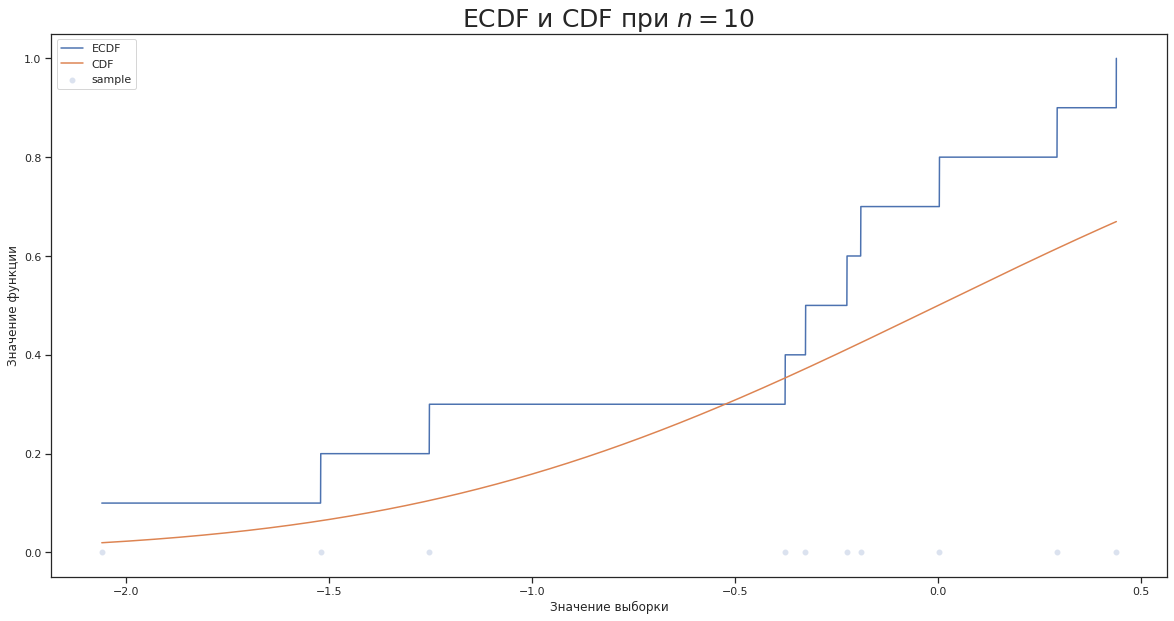

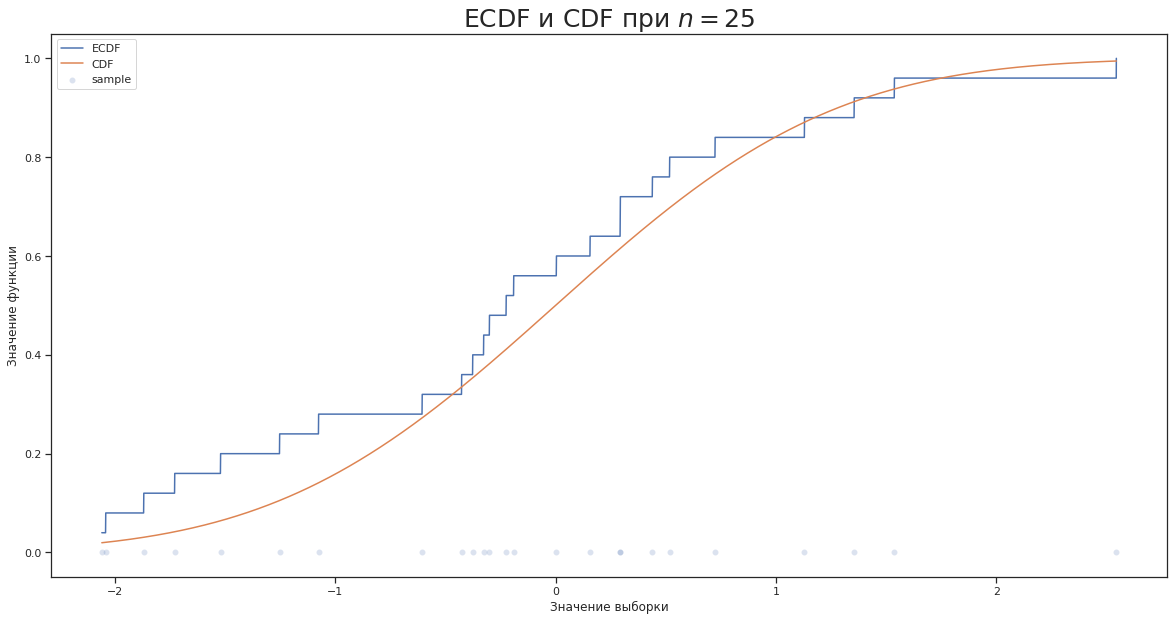

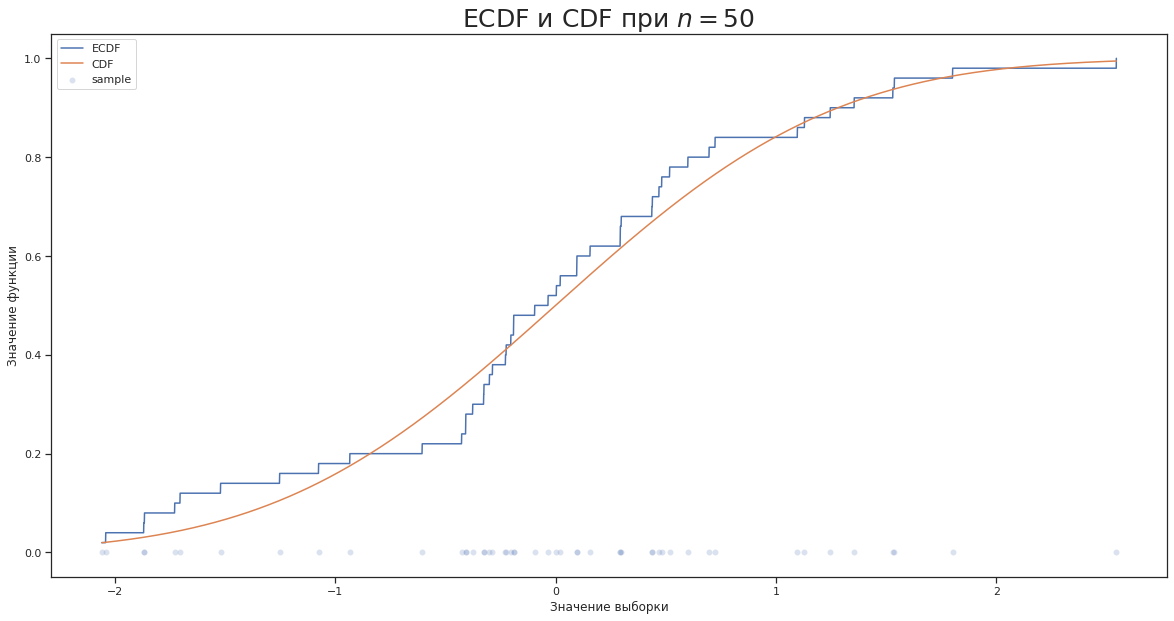

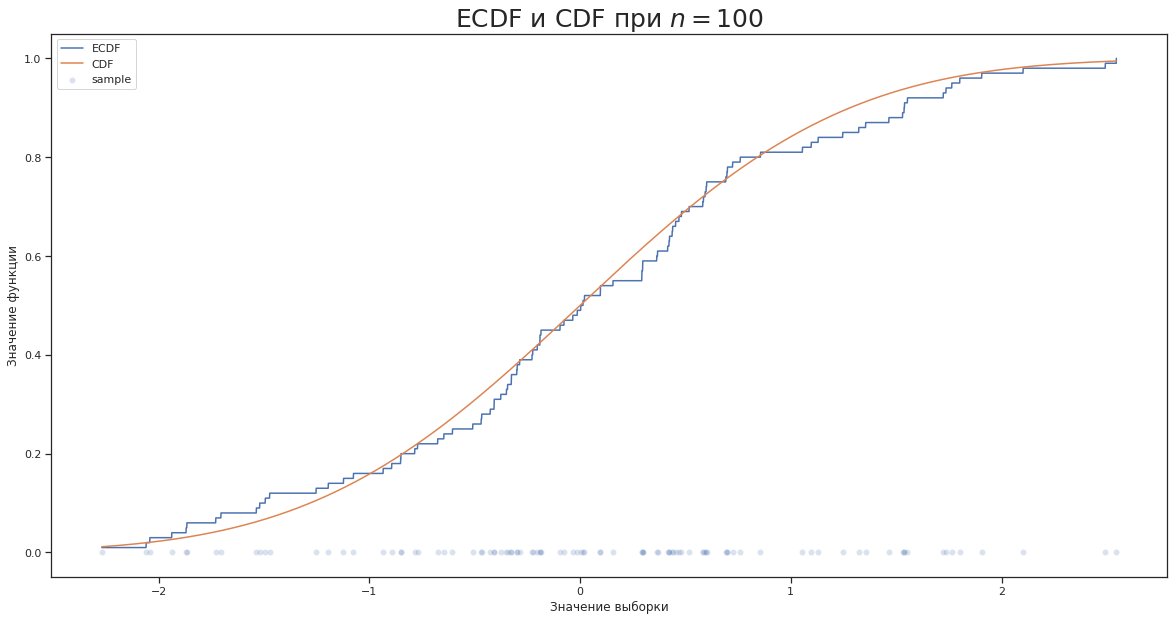

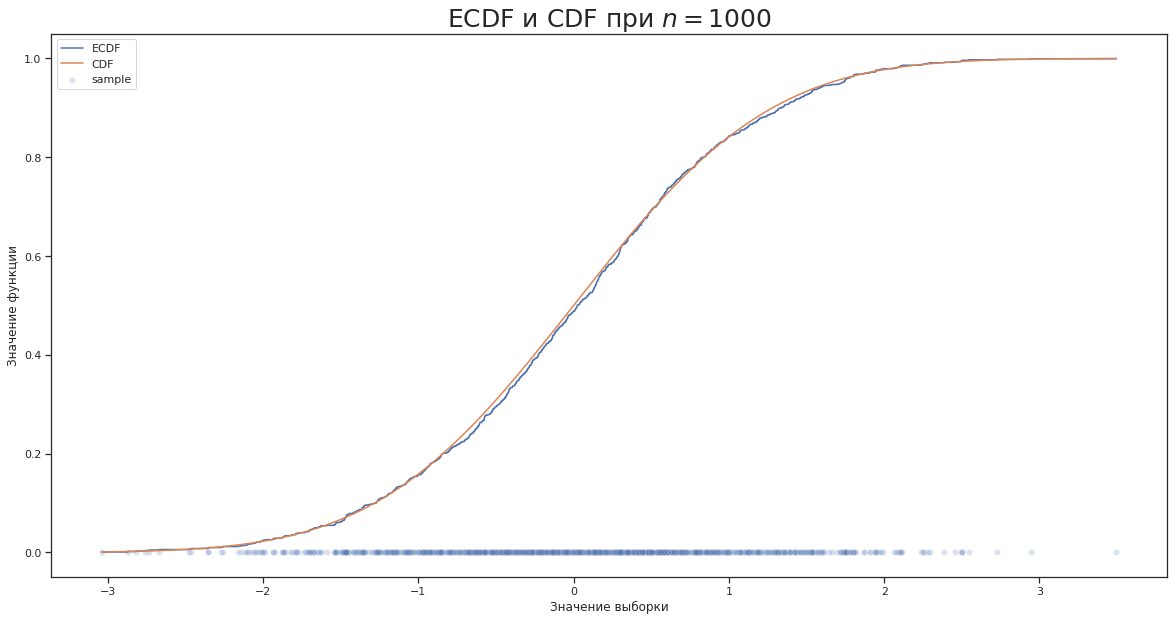

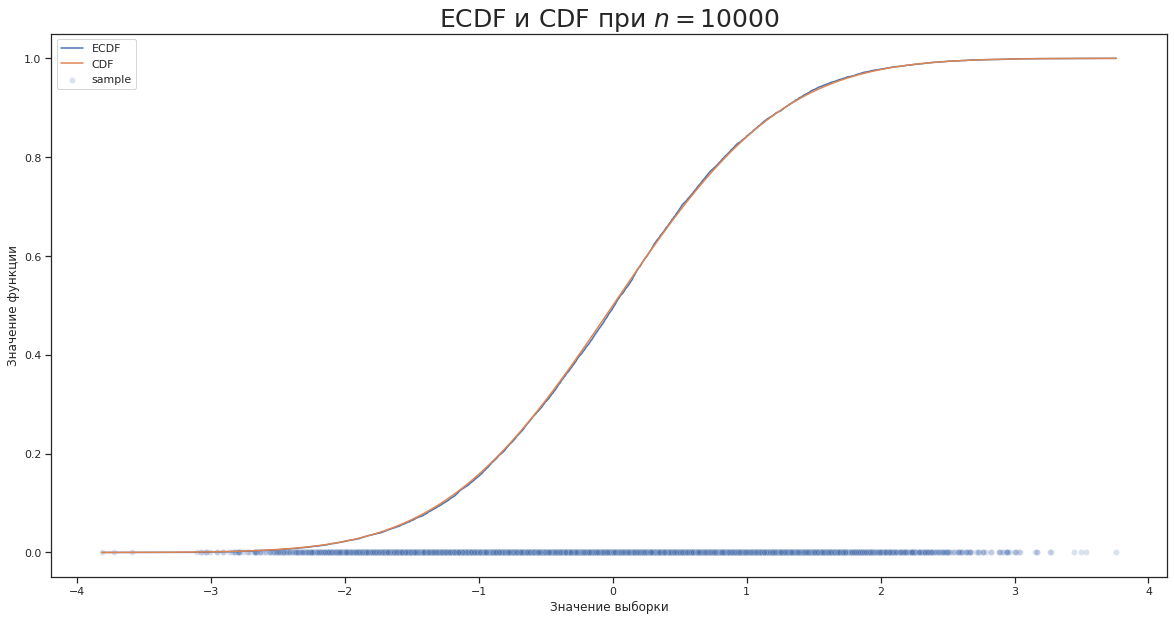

In [ ]:
X_n = [10, 25, 50, 100, 1000, N]
for n in X_n:
  build(n)

__Вывод:__  Из графиков видно, что с ростом $n$ эмпирическая функция распределения всё лучше приближает истинную функцию распределения

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


In [ ]:
D_n = []
sqrt_n_D_n = []
for n in range(0, N):
    sup = np.max(np.abs(ecdf[n].y - sps.norm.cdf(ecdf[n].x)))
    D_n.append(sup)
    sqrt_n_D_n.append(sup * np.sqrt(n + 1))

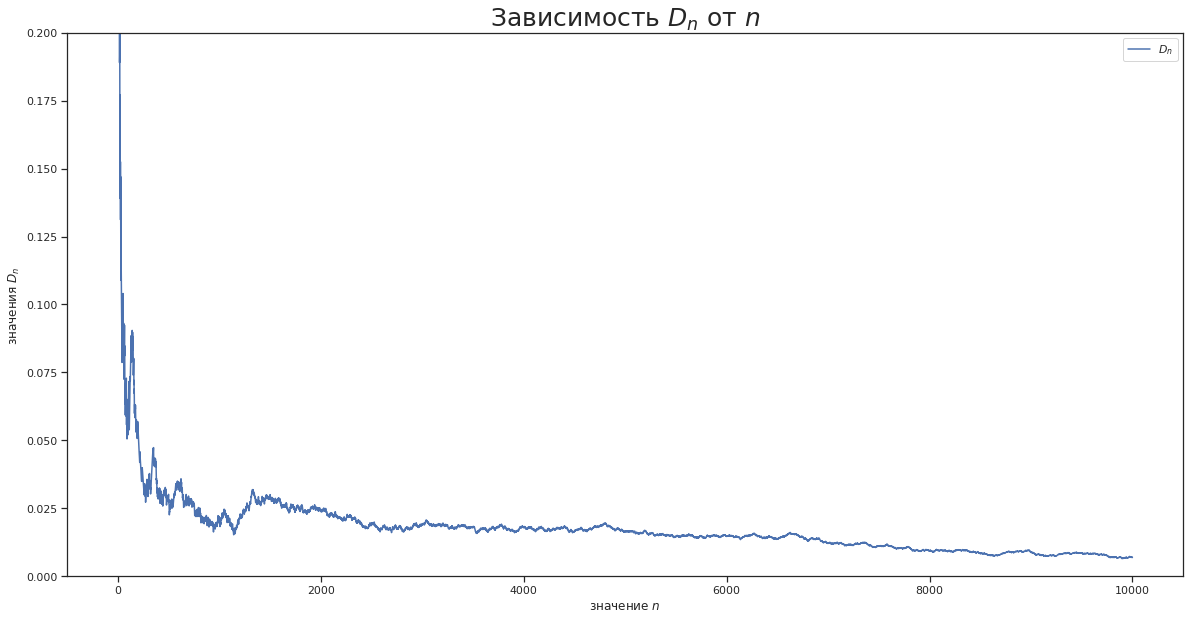

In [ ]:
n_range = np.arange(1, N + 1)
plt.figure(figsize=(20, 10))
sns.lineplot(x=n_range, y=D_n, label="$D_n$")
plt.ylim(0, 0.2)
plt.title("Зависимость $D_n$ от $n$", fontsize=25)
plt.ylabel("значения $D_n$")
plt.xlabel("значение $n$")
plt.show()

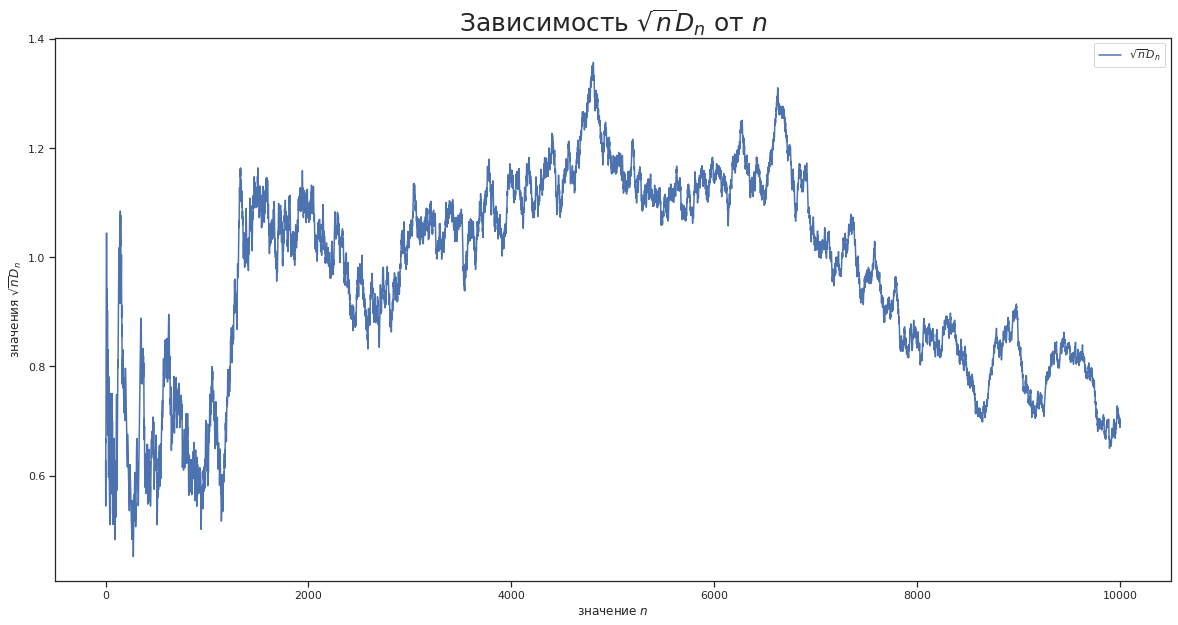

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=n_range, y=sqrt_n_D_n, label="$\\sqrt{n} D_n$")
plt.title("Зависимость $\\sqrt{n} D_n$ от $n$", fontsize=25)
plt.ylabel("значения $\\sqrt{n} D_n$")
plt.xlabel("значение $n$")
plt.show()

__Вывод:__  На первом графике можно увидеть, что с ростом $n$ $D_n$ стремитс к 0, что соответсвует теореме Гливенко-Кантелли, которая утверждает, что $D_n$ п. н. сходится к нулю при $n$ стремится к $\infty$

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

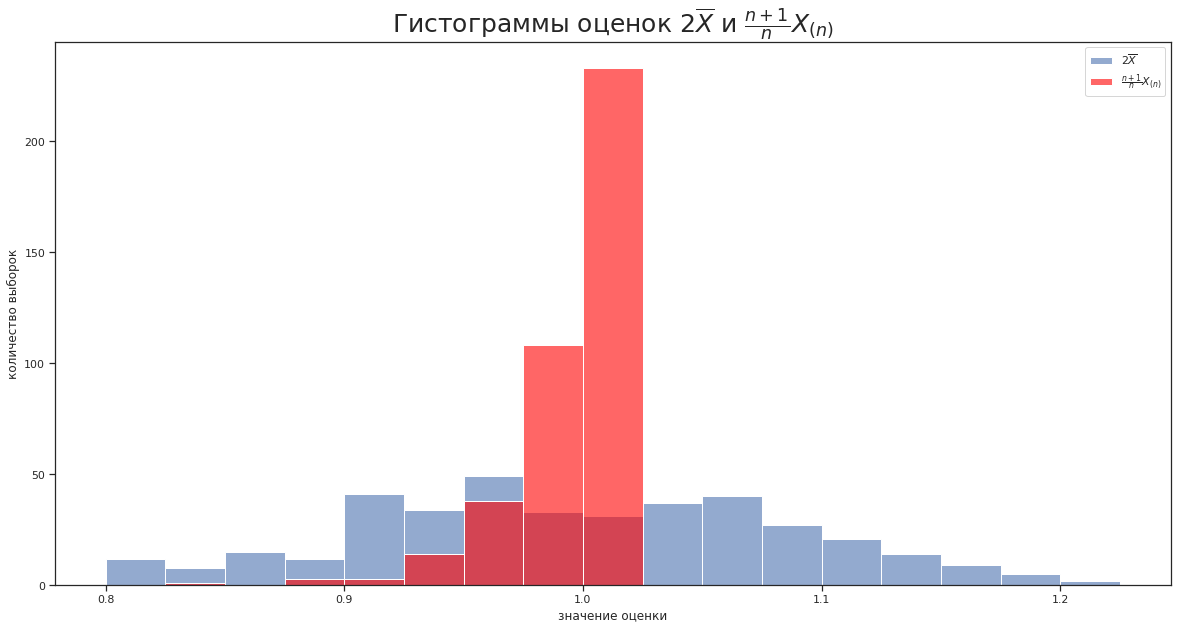

In [ ]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

theta = 1
X = []
for i in range(N_samples):
  X.append(sps.uniform(0, theta).rvs(N))
est1 = 2 * np.mean(X, axis=1)
est2 = ((N + 1)/N) * np.max(X, axis=1)

plt.figure(figsize=(20, 10))
sns.histplot(x=est1, bins=bins, alpha=0.6, label=r'$2\overline{X}$')
sns.histplot(x=est2, bins=bins, alpha=0.6, label=r'$\frac{n+1}{n} X_{(n)}$', color='red')
plt.legend()
plt.title("Гистограммы оценок $2\\overline{X}$ и $\\frac{n+1}{n} X_{(n)}$", fontsize=25)
plt.xlabel("значение оценки")
plt.ylabel("количество выборок")
plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

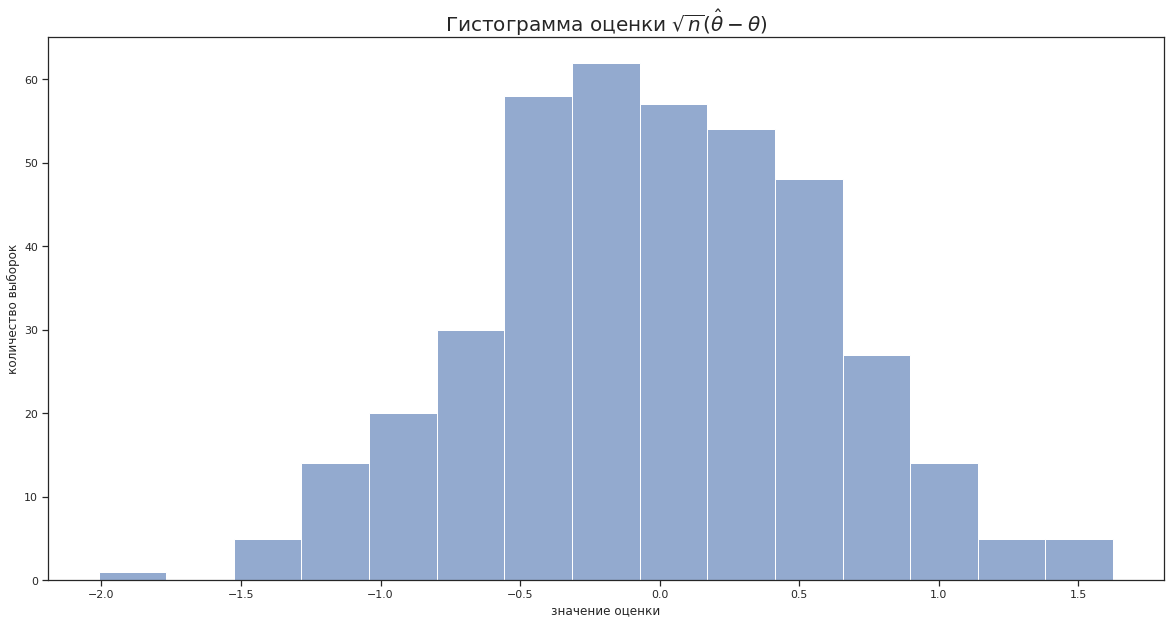

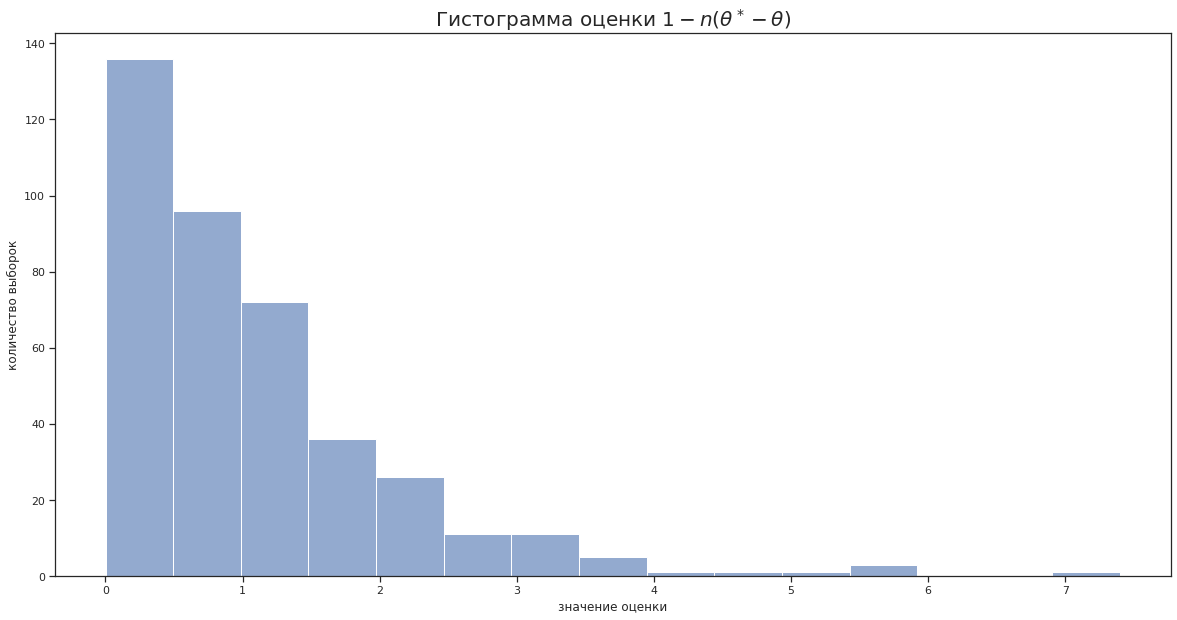

In [ ]:
est3 = np.sqrt(N)* (est1 - 1)
est4 = 1 - N * (est2 - 1)

plt.figure(figsize=(20, 10))
sns.histplot(x=est3, alpha=0.6, bins=15)
plt.title("Гистограмма оценки $\\sqrt{n} (\\hat\\theta - \\theta)$", fontsize=20)
plt.xlabel("значение оценки")
plt.ylabel("количество выборок")
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(x=est4, alpha=0.6, bins=15)
plt.title("Гистограмма оценки $1 - n  (\\theta^* - \\theta)$", fontsize=20)
plt.xlabel("значение оценки")
plt.ylabel("количество выборок")
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:** оценка $\sqrt{n} (\hat\theta - \theta)$ похожа на нормальное распределение, а оценка $1 - n  (\theta^* - \theta)$ на экспоненциальное.

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\frac{\theta}{\sqrt{3}}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

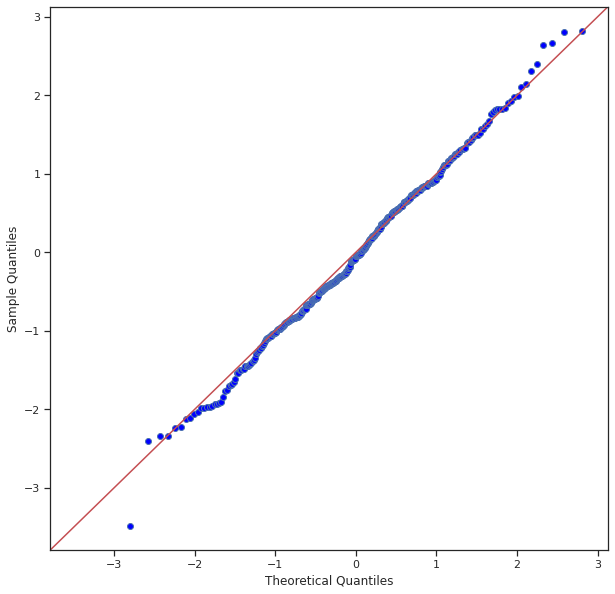

In [ ]:
import statsmodels.api as sm


theta_norm = est3 * np.sqrt(3)
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** да, можно

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** Лучше всего подходит экспоненциальное распределение, что соответствует выводу из гистрограммы

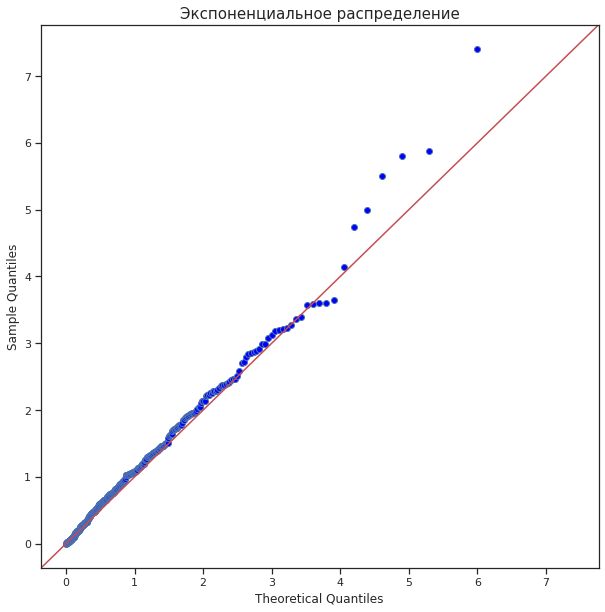

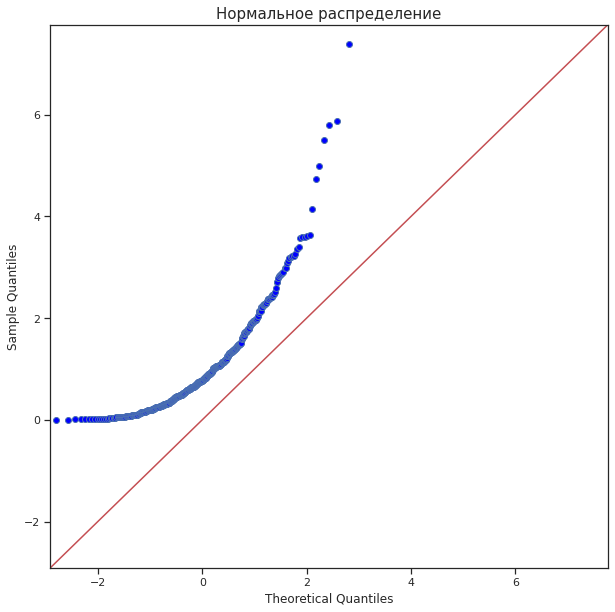

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(est4, line='45', ax=ax, dist=sps.expon)
plt.title("Экспоненциальное распределение", fontsize=15)
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(est4, line='45', ax=ax, dist=sps.norm)
plt.title("Нормальное распределение", fontsize=15)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** Из графиков видно, что $\theta^*$ сходится быстрее всех, что означает, что она самая «выгодная»

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.